# Wholesale customers Data Set
##### Annual spending in monetary units of clients of a wholesale distributor

https://archive.ics.uci.edu/ml/datasets/wholesale+customers

## Libraries

In [718]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import cluster
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import InterclusterDistance #cluster viz

## Database

In [719]:
df = pd.read_csv('Wholesale customers data.csv')

In [720]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Attribute Information:

- FRESH: annual spending (m.u.) on fresh products (Continuous); 
- MILK: annual spending (m.u.) on milk products (Continuous); 
- GROCERY: annual spending (m.u.)on grocery products (Continuous); 
    - épicerie
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
    - cleaning products
- DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
    - meats (épicierie fine, charcuterie)
- CHANNEL: customer Channel - Horeca (Hotel/Restaurant/Café) or Retail channel (Nominal)
    - Channel = {Horeca : 1, Retail : 2}
    - Horeca is an abbreviation for the food service industry
- REGION: customers Region - Lisbon, Porto or Other (Nominal) 
    - Region = {Lisbon : 1, Porto : 2, Other region : 3}

##### My project goal is to use various clustering techniques to segment customers. 

## Exploratory Data Analysis

In [721]:
df.shape

(440, 8)

In [722]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [723]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [724]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [725]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [726]:
df.Region.value_counts()
# Channel = {Horeca : 1, Retail : 2}

3    316
1     77
2     47
Name: Region, dtype: int64

In [727]:
df.Region.value_counts()
# Region = {Lisbon : 1, Porto : 2, Other region : 3}

3    316
1     77
2     47
Name: Region, dtype: int64

In [728]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

### Continuous columns : Fresh, Milk, Grocery, Frozen,Detergents_Paper & Delicassen

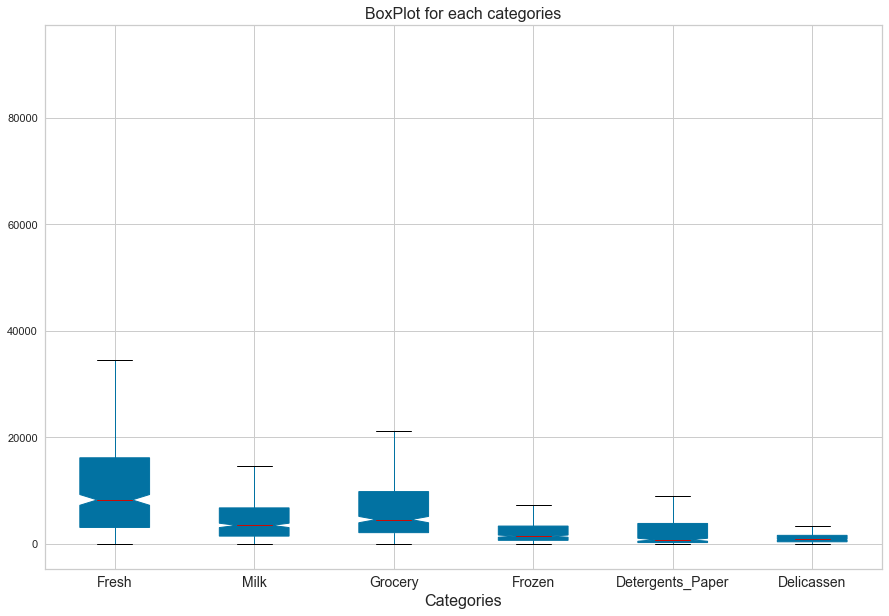

In [762]:
fig, ax = plt.subplots(figsize=(15, 10))
boxplot = df.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen',
                             'Detergents_Paper','Delicassen'],patch_artist=True, fontsize=11,
                     notch=True,showfliers=True)
plt.title("BoxPlot for each categories",fontsize=16)
plt.xlabel('Categories', fontsize=16)
plt.xticks(fontsize=14)
plt.show()

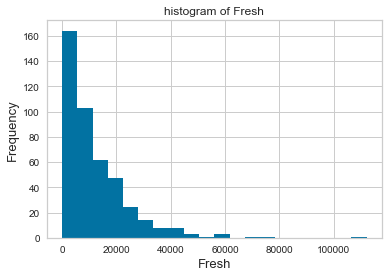

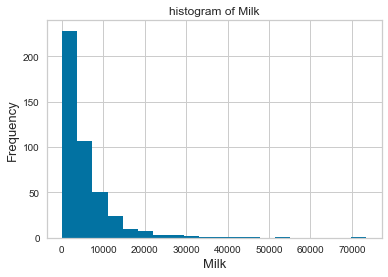

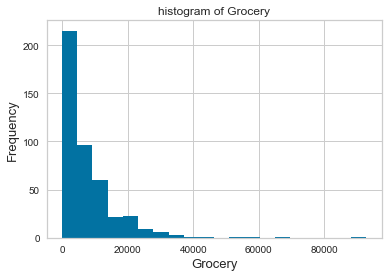

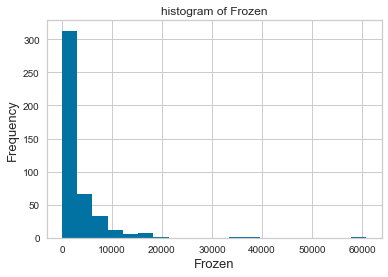

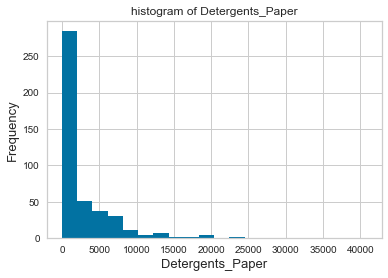

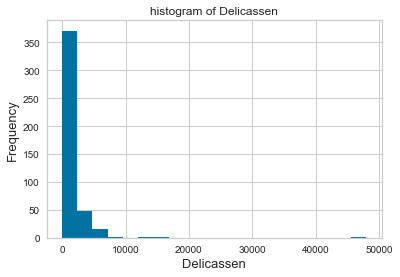

<Figure size 432x288 with 0 Axes>

In [730]:
def plot_continous(i):
    if df[i].dtype=='int':
        plt.title("histogram of "+str(i))        
        df[i].plot.hist(bins = 20)
        plt.xlabel(i, fontsize=13)
        plt.ylabel('Frequency', fontsize=13)
        plt.show()
        plt.clf()
    return
j=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for i in j:
    plot_continous(i)

### Nominal columns : Channel & Region

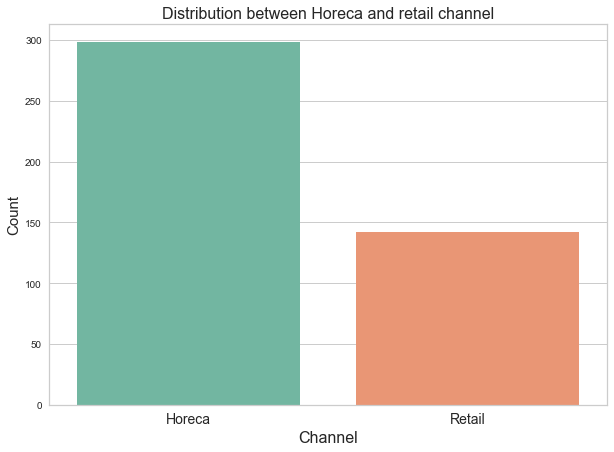

In [731]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='Channel',data=df,palette="Set2")
plt.title('Distribution between Horeca and retail channel',fontsize=16)
plt.xlabel('Channel', fontsize=16)
plt.ylabel('Count',fontsize=15)
ax.set_xticklabels(['Horeca','Retail'])
plt.xticks(fontsize=14)
plt.show()

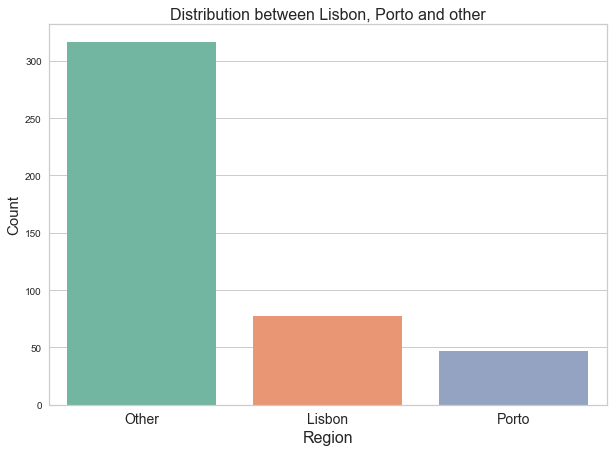

In [732]:
fig, ax = plt.subplots(figsize=(10, 7))
sns.countplot(x='Region',data=df,palette="Set2",
             order = df['Region'].value_counts().index)
plt.title('Distribution between Lisbon, Porto and other',fontsize=16)
plt.xlabel('Region', fontsize=16)
plt.ylabel('Count',fontsize=15)
ax.set_xticklabels(['Other','Lisbon', 'Porto'])
plt.xticks(fontsize=14)
plt.show()

### Correlation

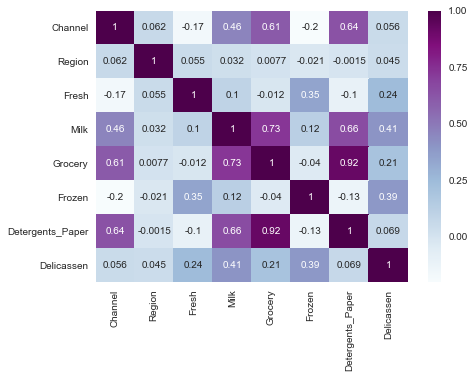

In [733]:
# correlation
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(df.corr(),cmap="BuPu",annot=True)
plt.show()

# there are correlations with Channel between Grocery, Detergents_Paper and Milk
# strong correlation between milk & grocery, grocery & detergents_paper

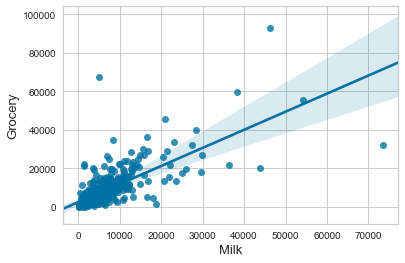

In [734]:
sns.regplot(data=df,x='Milk',y='Grocery')
plt.xlabel('Milk', fontsize=13)
plt.ylabel('Grocery', fontsize=13)
plt.show()

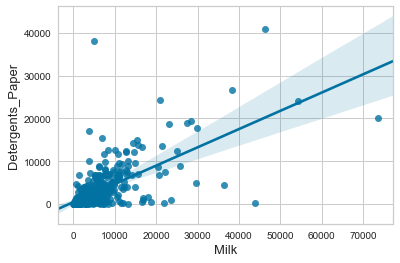

In [735]:
sns.regplot(data=df,x='Milk',y='Detergents_Paper')
plt.xlabel('Milk', fontsize=13)
plt.ylabel('Detergents_Paper', fontsize=13)
plt.show()

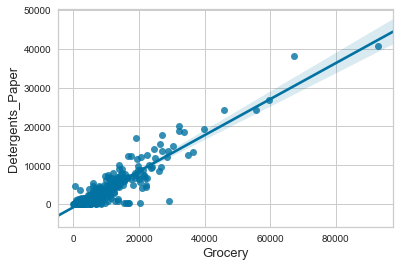

In [736]:
sns.regplot(data=df,x='Grocery',y='Detergents_Paper')
plt.xlabel('Grocery', fontsize=13)
plt.ylabel('Detergents_Paper', fontsize=13)
plt.show()

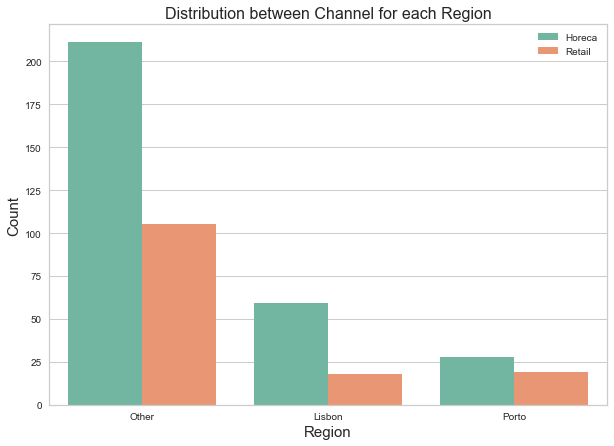

In [737]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot(x="Region", hue="Channel", data=df,palette="Set2",
                   order = df['Region'].value_counts().index)
plt.title('Distribution between Channel for each Region',fontsize=16)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Count',fontsize=15)
ax.set_xticklabels(['Other','Lisbon', 'Porto'])
plt.legend(['Horeca','Retail'])
plt.show()

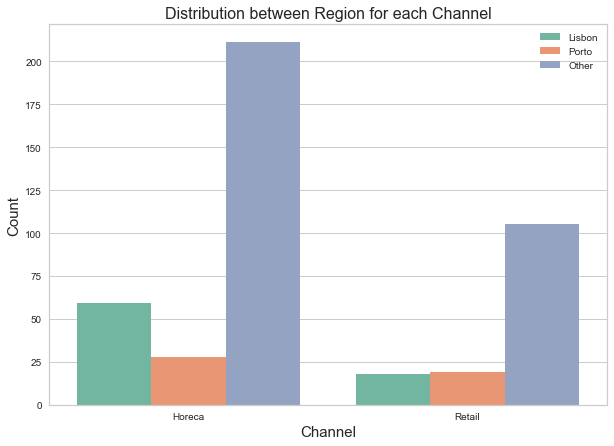

In [738]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot(x="Channel", hue="Region", data=df,palette="Set2",
                   order = df['Channel'].value_counts().index)
plt.title('Distribution between Region for each Channel',fontsize=16)
plt.xlabel('Channel', fontsize=15)
plt.ylabel('Count',fontsize=15)
ax.set_xticklabels(['Horeca','Retail'])
plt.legend(['Lisbon','Porto','Other'])
plt.show()

### Outliers

In [739]:
df_outlr = df.copy()

In [740]:
#outliers 
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

j=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for i in j : 
    df = remove_outlier(df_outlr,i)

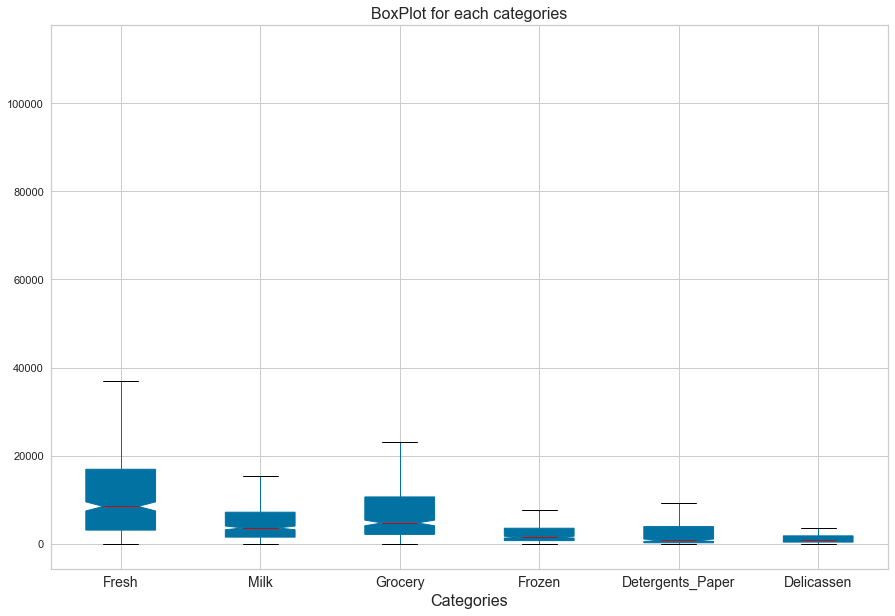

In [741]:
fig, ax = plt.subplots(figsize=(15, 10))
boxplot = df_outlr.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen',
                             'Detergents_Paper','Delicassen'],patch_artist=True, fontsize=11,
                     notch=True,showfliers=True)
plt.title("BoxPlot for each categories",fontsize=16)
plt.xlabel('Categories', fontsize=16)
plt.xticks(fontsize=14)
plt.show()

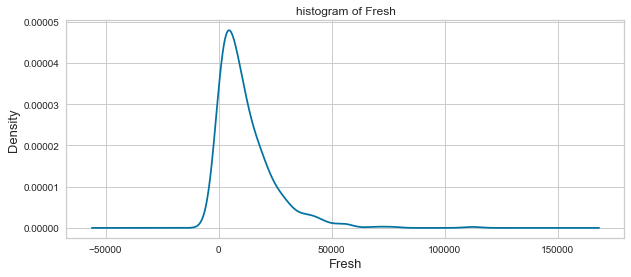

<Figure size 432x288 with 0 Axes>

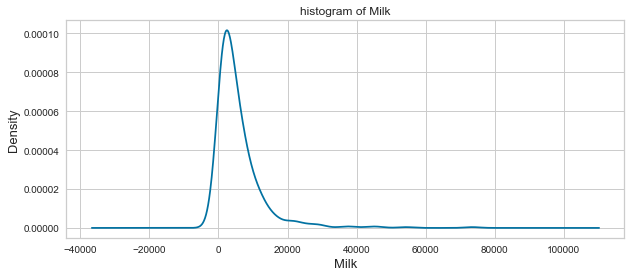

<Figure size 432x288 with 0 Axes>

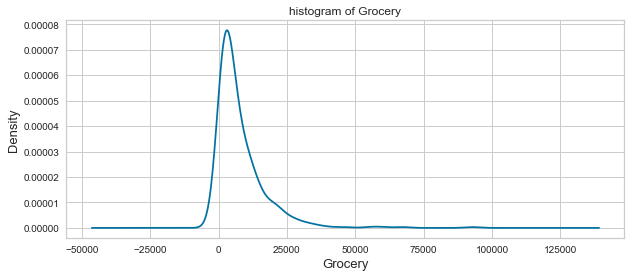

<Figure size 432x288 with 0 Axes>

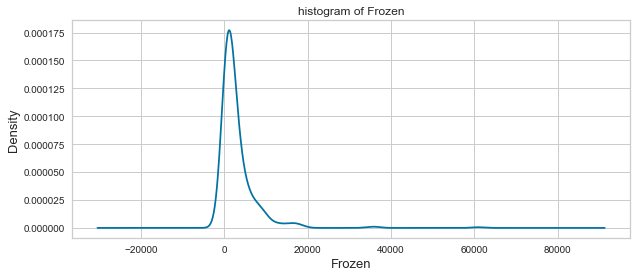

<Figure size 432x288 with 0 Axes>

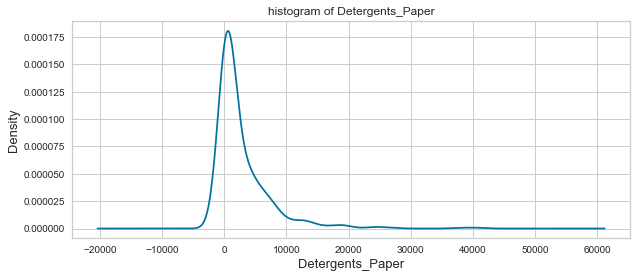

<Figure size 432x288 with 0 Axes>

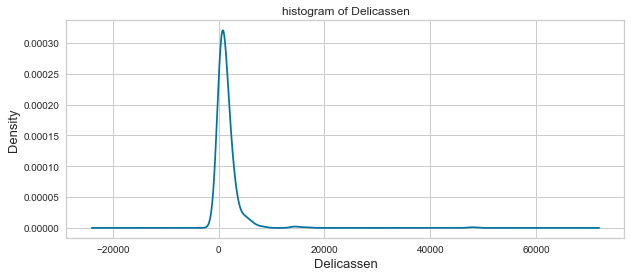

<Figure size 432x288 with 0 Axes>

In [742]:
def plot_continous(i):
    if df_outlr[i].dtype=='int':
        fig, ax = plt.subplots(1,1, figsize=(10, 4))
        plt.title("histogram of "+str(i))        
        df_outlr[i].plot.kde()
        plt.xlabel(i, fontsize=13)
        plt.ylabel('Density', fontsize=13)
        plt.show()
        plt.clf()
    return
j=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
for i in j:
    plot_continous(i)

## Feature Engineering

In [743]:
cust = df_outlr.copy()

### PCA

In [744]:
# The pca algorithm is being used to convert data that might be overly 
# dispersed into a set of linear combinations that can more easily be interpreted.
pca = PCA(n_components=2)
pComp = pca.fit(df.iloc[:, 2:9])
# I use the explained_variance_ratio_ method of my 2 components analysis object 
# to see how much of the variance is explained by each of our principle components vectors.
print(f' Percentage of variance PC-0 : {round(100*(pComp.explained_variance_ratio_)[0], 0)}%')
print(f' Percentage of variance PC-1 : {round(100*(pComp.explained_variance_ratio_)[1], 0)}%')
print(f' sum of the ratios : {round(100*np.sum(pComp.explained_variance_ratio_), 0)}%')
# The two components contain 90.0% of the information.
# So two components can explain 90.0% of the variance from these 6 features.


 Percentage of variance PC-0 : 49.0%
 Percentage of variance PC-1 : 41.0%
 sum of the ratios : 90.0%


In [745]:
# For correlations between the components and original variables 
# using the components_ method of the PCA() object.
col = ['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
components = pd.DataFrame(pComp.components_, columns = col)
components
# For the component 0 : fresh is significant
# For the component 1 : Fresh, Milk & Grocery are significant so this component is 
  # correlated well with Fresh, Milk & Grocery

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.814831,-0.245117,-0.453268,0.106858,-0.243035,0.005641
1,0.568696,0.404908,0.649438,0.026229,0.299213,0.025465


In [746]:
# I need to create a new dataframe with my components
info = pca.fit_transform(df.iloc[:, 2:9])
new_data = pd.DataFrame(info, columns=['PC-0', 'PC-1'])

In [747]:
new_data

,PC-0,PC-1
0,-417.586207,2524.283483
1,-5920.426502,935.505644
2,4846.301041,-3205.999972
3,-1361.977576,-1722.704081
4,898.990939,-653.366284
5,-4253.210416,-799.224628
6,-3536.602743,-4907.247770
7,-12379.417620,8134.246387
8,-9762.161936,135.463908
9,4080.026650,-3257.729397


### Implementing the K Means Clustering 

#### Kelbow

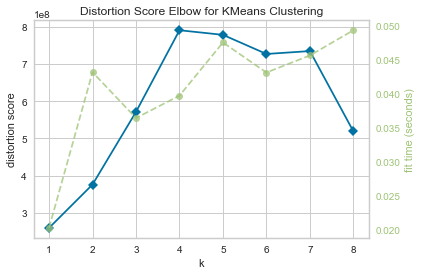

In [765]:
# I will use KElbowVisualizer implements the “elbow” method,
 # to find the best amount of clusters to get most accurate results.  
# The KElbowVisualizer also displays the amount of time to train 
 # the clustering model per K as a dashed green line.
#meanshift & dbscan + standardize the database 
model = cluster.KMeans()
visualizer = KElbowVisualizer(model, k=(1,9))
visualizer.fit(new_data)
visualizer.poof()
plt.show()
# k = 4

#### K-means

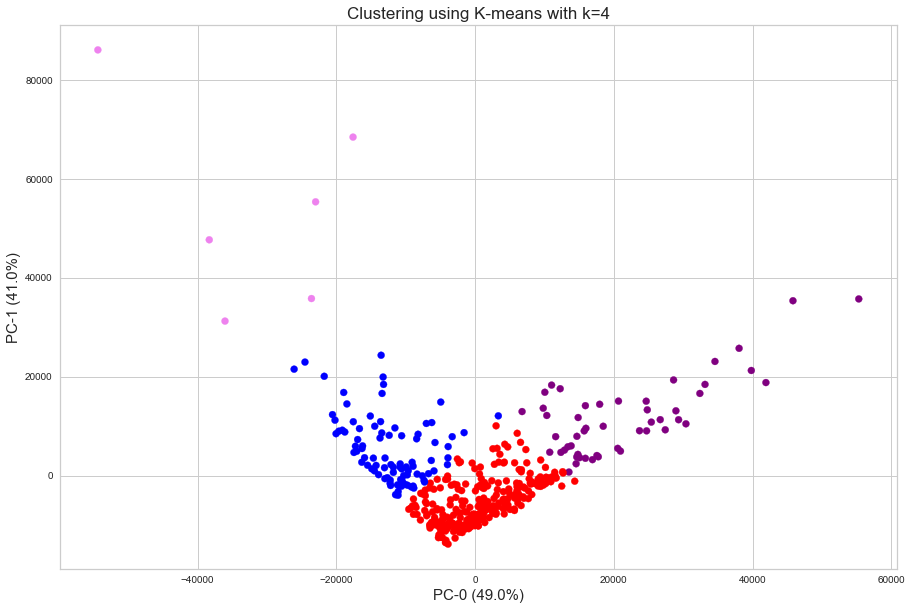

In [749]:
kmeans=KMeans(n_clusters=4)
kmeansoutput=kmeans.fit(new_data)
colors = np.array(["red", "blue", "purple", 'violet'])
plt.figure('Clustering using K-means with k=4', figsize=(15, 10))
plt.scatter(new_data.iloc[:, 0], new_data.iloc[:, 1], c=colors[kmeansoutput.labels_] )
plt.xlabel(f'PC-0 ({round(100*pComp.explained_variance_ratio_[0], 0)}%)',fontsize=15)
plt.ylabel(f'PC-1 ({round(100*pComp.explained_variance_ratio_[1], 0)}%)',fontsize=15)
plt.title('Clustering using K-means with k=4',fontsize=17)
plt.show()
# This plot shows 4 groups : they stand out significantly from each other

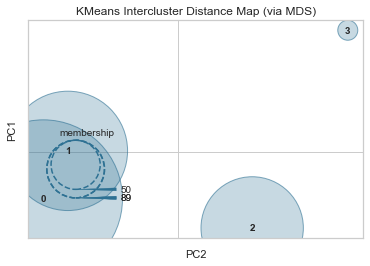

In [750]:
# Instantiate the clustering model and visualizer
visualizer = InterclusterDistance(KMeans(4))

visualizer.fit(new_data) # Fit the training data to the visualizer
visualizer.poof() # Draw/show/poof the data

# The closer to centers are in the visualization, 
 # the closer they are in the original feature space.
# Note however, that because two clusters overlap in the 2D space, 
 # it does not imply that they overlap in the original feature space.

## Implementing the K Means Clustering to the database

In [751]:
cust_pred = df.copy()
cust_pred

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098
10,2,3,3366,5403,12974,4400,5977,1744
11,2,3,13146,1124,4523,1420,549,497


In [752]:
# Add new column with 4 clusters
cust_pred['clusters'] = kmeans.predict(new_data)
cust_pred['clusters'].value_counts()

0    268
1     89
2     50
3      6
Name: clusters, dtype: int64

### Convert  Channel and Region to categorical variable

In [753]:
cust_pred['Channel'] = cust_pred['Channel'].map({1:'Horeca', 2:'Retail'})

In [754]:
cust_pred['Region'].replace([1,2,3],['Lisbon','Porto','Other'],inplace=True)

In [755]:
cust_pred[cust_pred['clusters'] == 0] #subset = braket

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,Retail,Other,12669,9656,7561,214,2674,1338,0
3,Horeca,Other,13265,1196,4221,6404,507,1788,0
5,Retail,Other,9413,8259,5126,666,1795,1451,0
6,Retail,Other,12126,3199,6975,480,3140,545,0
7,Retail,Other,7579,4956,9426,1669,3321,2566,0
8,Horeca,Other,5963,3648,6192,425,1716,750,0
11,Retail,Other,13146,1124,4523,1420,549,497,0
15,Horeca,Other,10253,1114,3821,397,964,412,0
18,Retail,Other,18601,6327,10099,2205,2767,3181,0
19,Horeca,Other,7780,2495,9464,669,2518,501,0


In [756]:
cust_pred[(cust_pred['clusters'] == 2)&(cust_pred['Region'] == 'Porto')]#subset = brakets

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
311,Horeca,Porto,29635,2335,8280,3046,371,117,2
324,Horeca,Porto,25977,3587,2464,2369,140,1092,2
335,Retail,Porto,27082,6817,10790,1365,4111,2139,2


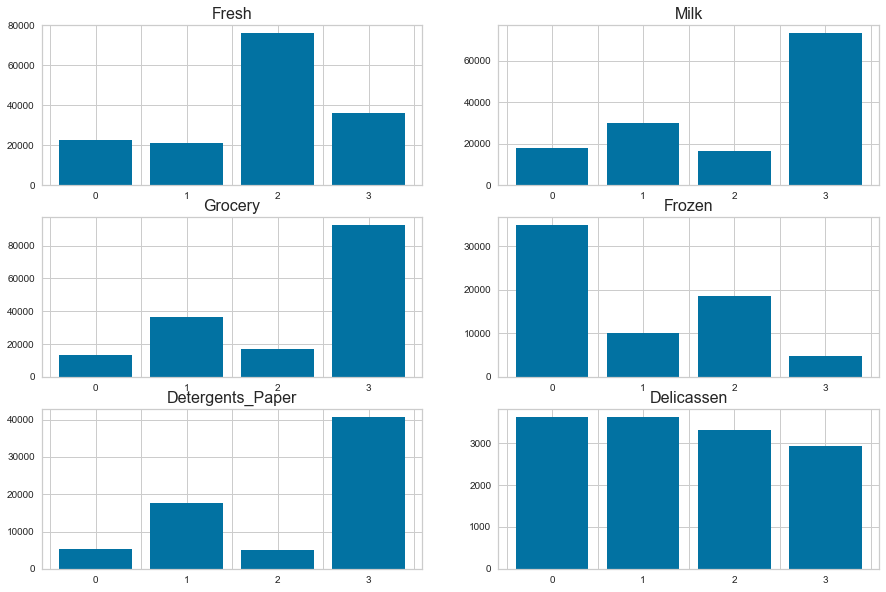

In [757]:
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(15, 10))
x = cust_pred.clusters
a = cust_pred.Fresh
b = cust_pred.Milk
c = cust_pred.Grocery
d = cust_pred.Frozen
e = cust_pred.Detergents_Paper
f = cust_pred.Delicassen
axs[0, 0].bar(x,a)
axs[0, 0].set_title('Fresh',fontsize=16)
axs[0, 0].set_xticklabels([' ',' ','0',' ','1',' ','2',' ','3'])
axs[0, 1].bar(x,b)
axs[0, 1].set_title('Milk',fontsize=16)
axs[0, 1].set_xticklabels([' ',' ','0',' ','1',' ','2',' ','3'])
axs[1, 0].bar(x,c)
axs[1, 0].set_title('Grocery',fontsize=16)
axs[1, 0].set_xticklabels([' ',' ','0',' ','1',' ','2',' ','3'])
axs[1, 1].bar(x,d)
axs[1, 1].set_title('Frozen',fontsize=16)
axs[1, 1].set_xticklabels([' ',' ','0',' ','1',' ','2',' ','3'])
axs[2, 0].bar(x,e)
axs[2, 0].set_title('Detergents_Paper',fontsize=16)
axs[2, 0].set_xticklabels([' ',' ','0',' ','1',' ','2',' ','3'])
axs[2, 1].bar(x,f)
axs[2, 1].set_title('Delicassen',fontsize=16)
axs[2, 1].set_xticklabels([' ',' ','0',' ','1',' ','2',' ','3'])
plt.show()

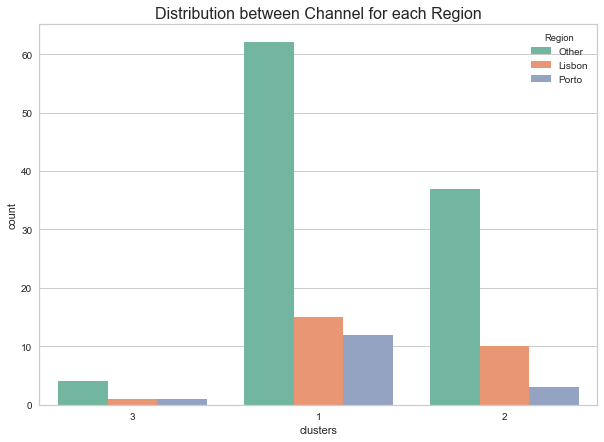

In [759]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot(x="clusters", hue="Region", data=cust_pred,palette="Set2",
                   order = df['Region'].value_counts().index)
plt.title('Distribution between clusters for each Region',fontsize=16)
#plt.xlabel('Region', fontsize=15)
#plt.ylabel('Count',fontsize=15)
#ax.set_xticklabels(['Other','Lisbon', 'Porto'])
#plt.legend(['Horeca','Retail'])
plt.show()

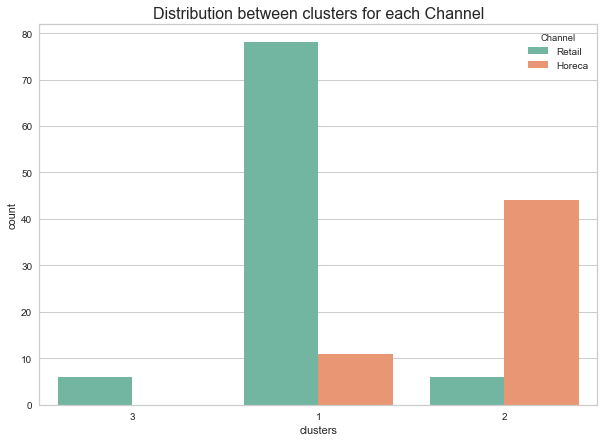

In [760]:
fig, ax = plt.subplots(figsize=(10, 7))
ax = sns.countplot(x="clusters", hue="Channel", data=cust_pred,palette="Set2",
                   order = df['Region'].value_counts().index)
plt.title('Distribution between clusters for each Channel',fontsize=16)
#plt.xlabel('Region', fontsize=15)
#plt.ylabel('Count',fontsize=15)
#ax.set_xticklabels(['Other','Lisbon', 'Porto'])
#plt.legend(['Horeca','Retail'])
plt.show()

                                                    '''THE END'''
                                                       🤓🙌🥳💃